In [181]:
R=pd.DataFrame(dict(  (k,pd.Series(v)) for k,v in hammer_result.items()  ))

In [1]:
# plt.figure(figsize=(15,7))

fig,ax=plt.subplots(3,1,figsize=(12,7))
ax[2].scatter(R.Bullish_time,R.Bullish_Close,c='red',marker="v",s=2)
ax[2].set_title("GOOGLE")

ax[1].scatter(R.Bearish_time,R.Bearish_Close,c='green',marker='^', s=2)
ax[1].set_title('Bearish signal')
ax[0].plot(dt.Close)
ax[0].set_title('Bullish  signal')


NameError: name 'plt' is not defined

In [ ]:
state=env.reset()
while True:
    action=env.action_space.sample()
    n_state,reward,done,info=env.step(action)
    
    if done:
        print('info',info)
        break

plt.figure(figsize=(12,5))
# plt.cla()
env.render_all()

env_maker=lambda : gym.make('stocks-v0',df=data2,frame_bound=(5,100),window_size=5)
env=DummyVecEnv([env_maker])
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=1000000)
env = gym.make('stocks-v0',
               df =data2 ,
               window_size =5,
               frame_bound = (70,300),)
state=env.reset()
while True:
    # state=state[np.newaxis,...]
    action,_state=model.predict(state)
    state,rewards,done,info=env.step(action)
    
    
    if done:
        print('info',info)
        break

plt.figure(figsize=(12,5))
plt.cla()
env.render_all()
    


**stating the ml stuff**

In [91]:
import numpy as np
import pandas as pd

data=pd.read_csv('cryptoData/BTC-USD.csv',parse_dates=True,index_col=0)
data.head(2)
data['PCT']=(data['Close'] - data['Open']) / data['Open'] *100
# data=data.drop(['Adj Close'],axis=1)
data['Adj_PTC']=data['Adj Close'] - data['Adj Close'].shift()
cand_data=data[['PCT','Adj Close','Volume','Adj_PTC']]
cand_data_2=cand_data.copy()

In [156]:
import math
# data.fillna(-9999,inplace=True)
forcast_col=cand_data['Adj Close']
forcast_out=int(math.ceil(0.001*len(-cand_data))) # shifted to 3
cand_data['lable']=forcast_col.shift(-forcast_out)

cand_data=cand_data.dropna()
status=True
if status:
    print('no Null is not the Data ')
else:
    print(cand_data.isnull().sum().sum())

# Trash above: 
# cand_data.drop('lable',axis=1,inplace=True)

no Null is not the Data 


C:\Users\Erfan\AppData\Local\Temp\ipykernel_1892\1786257732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cand_data['lable']=forcast_col.shift(-forcast_out)


In [187]:
cand_data
# X=cand_data.drop('lable',axis=1)
# y=cand_data['lable']X

array([[-1.89643187, -0.76189874, -0.81147804, -0.04785437],
       [-1.84802   , -0.76372078, -0.81130688, -0.04378678],
       [ 0.890413  , -0.76285365, -0.81135948,  0.01097178],
       ...,
       [-0.1746903 ,  0.22751698,  0.11710488, -0.11009356],
       [-0.13884584,  0.22397906,  0.08332369, -0.07872618],
       [-0.07899725,  0.22277103,  0.20504553, -0.03128398]])

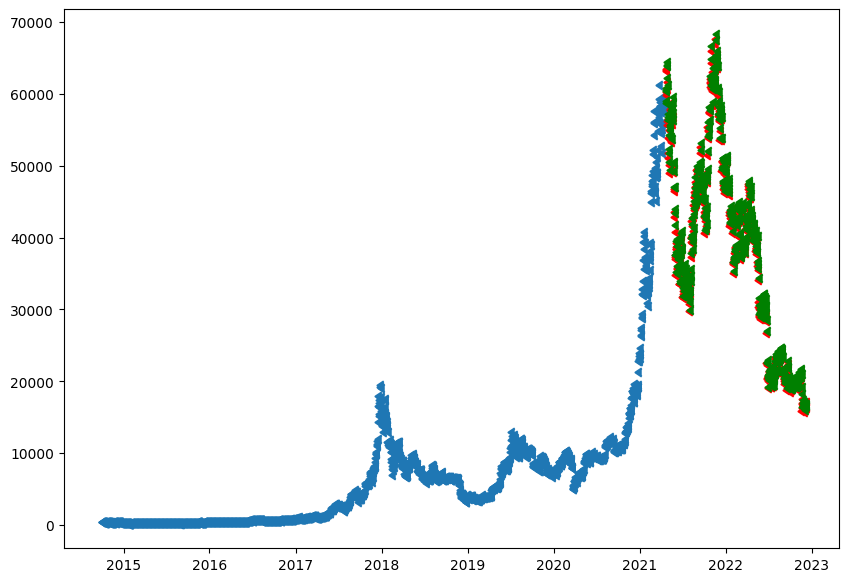

In [225]:
from sklearn.model_selection import train_test_split as split 
from sklearn import svm, preprocessing
from sklearn.linear_model import LinearRegression as LR 
X=preprocessing.scale(X)
X_train,X_test,y_train,y_test=split(X,y,test_size=0.2,shuffle=False)

clf=LR()
# svm_1=svm.SVR(kernel='poly')
# svm_1.fit(X_train,y_train)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
pred=clf.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_train.index,y_train,marker=4)
plt.scatter(y_test.index,y_test,mar
ker=4,c='red')
plt.scatter(y_test.index,pred,c='green',marker=4)

In [163]:
X.head(2)

,PCT,Adj Close,Volume,Adj_PTC
Date,,,,
2014-09-18,-7.096262,424.440002,34483200,-32.894012
2014-09-19,-6.910351,394.795990,37919700,-29.644012


0.9336795686376398


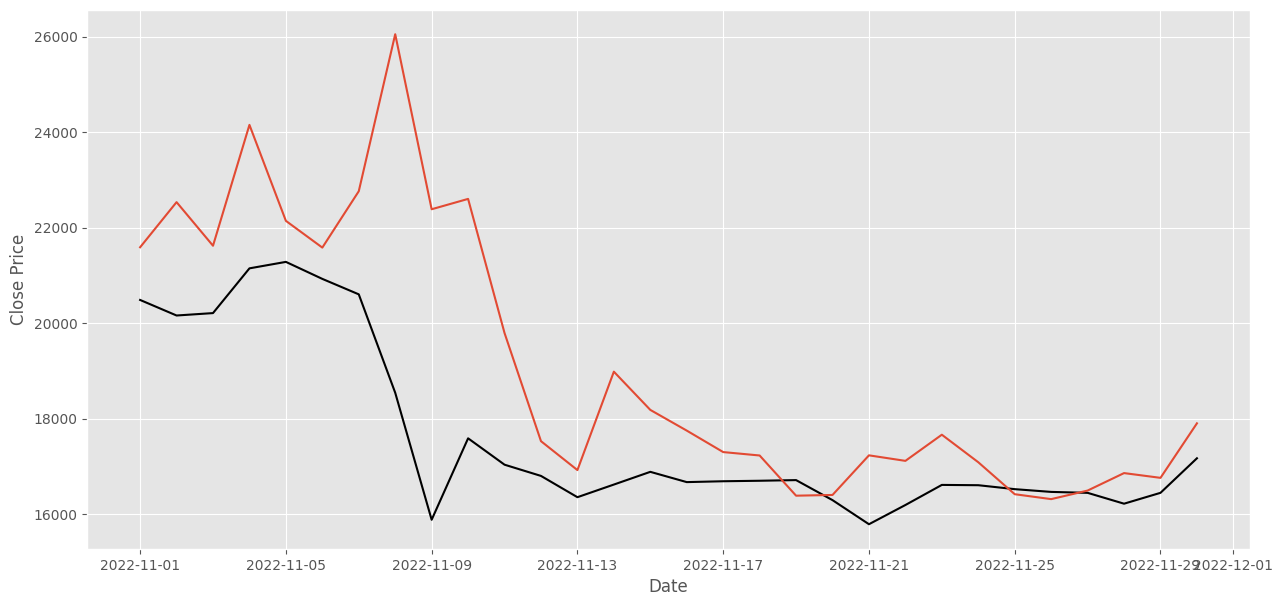

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression as LR
import  matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import math


data=pd.read_csv('cryptoData/BTC-USD.csv',parse_dates=True,index_col=0)
data['PCT']=(data['Close'] - data['Open']) / data['Open'] *100 # Percent change
data['Adj_PTC']=data['Adj Close'] - data['Adj Close'].shift()
cand_data=data[['PCT','Adj Close','Volume','Adj_PTC']]

# fill back ward of Nan on Adj_pTC columns
cand_data=cand_data.fillna(method='bfill')

forcast=int(math.ceil(0.01*len(cand_data))) # 30

label_col=pd.DataFrame(cand_data['Adj Close'])
label_col=label_col.shift(-forcast)
label_col.dropna(inplace=True)

# Preprocessing on X
X_lately=cand_data[-forcast:]
X=cand_data.iloc[:-forcast]
#  we Drop the 30 price of each x nad y but we keep them for more prediciton latet

X_train,X_test,y_train,y_test=split(X,label_col,test_size=0.2,) #shuffle=False
clf=LR()
clf.fit(X_train,y_train)
pred=clf.predict(X_lately)
accuracy=clf.score(X_test,y_test)
# # cand_data['Forecast']=np.nan()
# # cand_data['Forecast']=pred
print(accuracy)

plt.figure(figsize=(15,7))
# plt.plot(cand_data.index,cand_data['Adj Close'])
plt.plot(X_lately.index,X_lately['Adj Close'],c='black')
plt.plot(X_lately.index,pred)
plt.xlabel('Date')
plt.ylabel('Close Price')
# plt.legend(loc=4)
# plt.plot(X_test.index,clf.predict(X_test))
plt.show() 
api_key='88357A47C05F4604BDB50989D72B1829'

In [576]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['TSLA']
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

start_date=datetime(2012,12,1)
end_date=datetime(2022,12,15)
y_symbol=['GOOGL']
data = web.DataReader(y_symbol, data_source='yahoo', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('cryptoData/BTC-USD.csv',parse_dates=True,index_col=0)
data['PCT']=(data['Close'] - data['Open']) / data['Open'] *100 # Percent change
data['label']=data['Adj Close'] - data['Adj Close'].shift()


data['label']=data['Adj Close'].rolling(window=1).mean() -data['Adj Close'].shift()
data['label']=data['label'].fillna(method='bfill')
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,PCT,label
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,-1.831006,-32.894012
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-7.096262,-32.894012


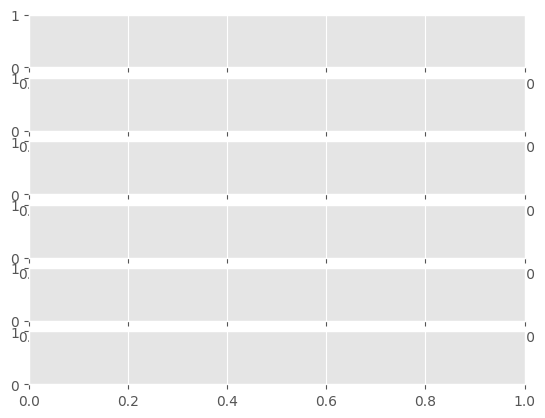

In [58]:

ax1=plt.subplots(6)
# ax2=plt.subplot2gird((6,1),(5,0),rowspan=1,colspan=1)
ax1[2].plot(data.index,data.Close)

In [ ]:
import torch
import gym
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the model architecture
class FinancialModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(FinancialModel, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training loop
def train(model, data, target, optimizer):
    # Reset the gradients
    optimizer.zero_grad()
    # Make predictions
    output = model(data)
    # Compute the loss
    loss = torch.nn.functional.mse_loss(output, target)
    # Backpropagate the error
    loss.backward()
    # Update the weights
    optimizer.step()

# Load and preprocess the data
data = ... # Load the data from a file or API
data = data.astype(float) # Convert the data to float type
data = (data - data.mean()) / data.std() # Normalize the data
data = torch.tensor(data).float() # Create a tensor from the data

# Split the data into training and test sets
train_data, test_data = torch.utils.data.random_split(data, [80, 20])

# Create the model and optimizer
model = FinancialModel(input_size=data.shape[1], output_size=3)
optimizer = torch.optim.Adam(model.parameters())

# Set up the environment
env = gym.make('FinancialTrading-v0')

# Train the model
for epoch in range(1000):
    for data, target in train_data:
        # Reset the environment
        state = env.reset()
        done = False
        while not done:
            # Select an action
            action = model(state)
            # Take a step in the environment
            state, reward, done, _ = env.step(action)
            # Train the model
            train(model, state, reward, optimizer)

# Validate the model

for data, target in test_data:
    output = model(data)
    loss = torch.nn.functional.mse_loss(output, target)

# Use the trained model to make decisions
new_data = pd.Read_csv('cryptoData/SOL-USD.csv')
new_data = new_data.astype(float) # Convert the data to float type
new_data = (new_data - new_data.mean()) / new_data.std() # Normalize the data
new_data


In [85]:
block_time=input('here : ').capitalize()
if block_time in (['Think', 'Though','Thinking']):
     block_time = ('Thinking')
else:print('False')

print(block_time)

False

